In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

In [3]:
## Gamma analysis
gamma = np.load('gamma_analysis.npz')
gamma_pba = np.load('gamma_analysis_pba.npz')

pr = gamma["arr_1"]
pr_pba = gamma_pba["arr_1"]
print(pr.shape, pr_pba.shape)

# Print statistics
ind_gamma = 0 
print("OURS:",
      'Mean', np.mean(pr[ind_gamma]),
      'std', np.std(pr[ind_gamma]),
      'min', np.amin(pr[ind_gamma]), 
      'max', np.amax(pr[ind_gamma])
     )
print("PBA: ", 
      'Mean', np.mean(pr_pba[ind_gamma]),
      'std', np.std(pr_pba[ind_gamma]),
      'min', np.amin(pr_pba[ind_gamma]),
      'max', np.amax(pr_pba[ind_gamma])
     )

pr_sec = np.sum(gamma["arr_2"], axis=0) / np.sum(gamma["arr_2"])
pr_pba_sec = np.sum(gamma_pba["arr_2"], axis=0) / np.sum(gamma_pba["arr_2"])
print(pr_sec, pr_pba_sec)

(2, 3888) (2, 3888)
OURS: Mean 0.9937498395077028 std 0.01175784407792475 min 0.8444696189495365 max 1.0
PBA:  Mean 0.986795176295064 std 0.031481831389819075 min 0.6051987652461979 max 1.0
[0.01627394 0.03886883 0.15603453 0.7888227 ] [0.00828419 0.0132674  0.15172865 0.82671975]


In [4]:
print(gamma["arr_0"], gamma_pba["arr_0"])

[[1951 3501 3368 ... 3322 3301 3255]
 [1951 2139 1860 ...  937 2573 3322]] [[1776 1772 2765 ... 1034 1016  296]
 [1776 1772 1617 ... 2729  436 1615]]


In [5]:
## Error analysis
errors = np.load('error_analysis.npz')
errors_pba = np.load('error_analysis_pba.npz')

re = errors["arr_1"]
re_pba = errors_pba["arr_1"]
print(re.shape, re_pba.shape)

# Print statistics
ind_error = 1 # 1 for relative, 0 for absolute
print("OURS:",
      'Mean', np.mean(re[ind_error]),
      'std', np.std(re[ind_error]),
      'min', np.amin(re[ind_error]), 
      'max', np.amax(re[ind_error])
     )
print("PBA: ", 
      'Mean', np.mean(re_pba[ind_error]),
      'std', np.std(re_pba[ind_error]),
      'min', np.amin(re_pba[ind_error]),
      'max', np.amax(re_pba[ind_error])
     )

re_sec = np.mean(errors["arr_2"], axis=0)
re_pba_sec = np.mean(errors_pba["arr_2"], axis=0)
print(re_sec, re_pba_sec)

(2, 3888) (2, 3888)
OURS: Mean 0.12615038548709398 std 0.1087545708528558 min 0.025037090139850882 max 1.2575679183089519
PBA:  Mean 0.30619215894828655 std 0.308523717521688 min 0.05899779821077778 max 4.076800357311962
[0.10979873 0.1259125  0.24522143 0.49071131] [0.20299007 0.16097642 0.47397491 1.34684853]


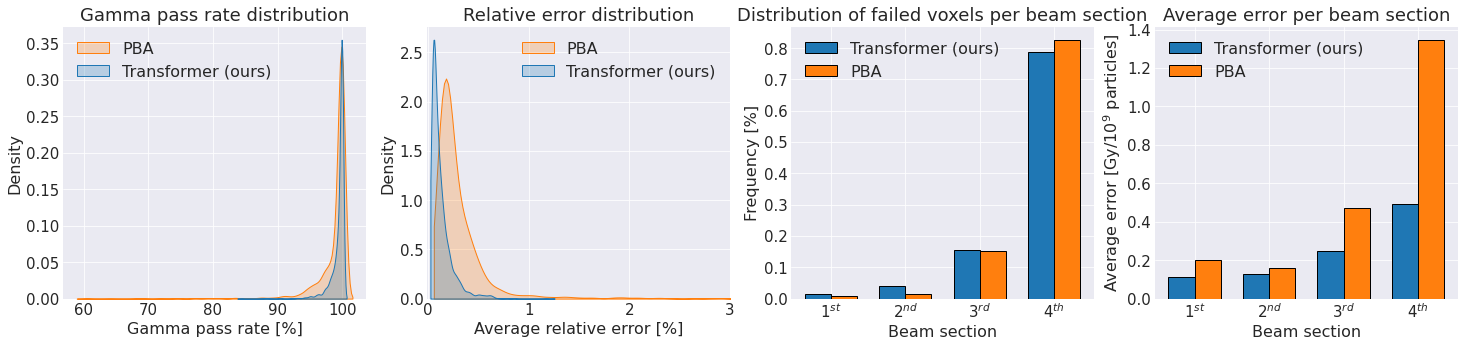

In [6]:
## Plot distributions
fig, axs = plt.subplots(1, 4, figsize=(25,5))
#axs[0].hist([100*pr[ind_gamma],100*pr_pba[ind_gamma]],15, density=True)
sns.kdeplot(data=[100*pr[ind_gamma],100*np.tile(pr_pba[ind_gamma],2)],fill=True,ax=axs[0])
axs[0].set_title('Gamma pass rate distribution', fontsize=18)
axs[0].set_xlabel('Gamma pass rate [%]', fontsize=16)
axs[0].set_ylabel('Density', fontsize=16)
axs[0].xaxis.set_tick_params(labelsize=15)
axs[0].yaxis.set_tick_params(labelsize=15)
axs[0].legend(['PBA', 'Transformer (ours)'], fontsize=16, loc='upper left')
num_sections = len(re_sec)
x = np.arange(num_sections)  # the label locations
width = 0.35  # the width of the bars
axs[2].bar(x - width/2, pr_sec, width, label='Transformer (ours)', linewidth=1, edgecolor='k')
axs[2].bar(x + width/2, pr_pba_sec, width, label='PBA',  linewidth=1, edgecolor='k')
axs[2].set_title('Distribution of failed voxels per beam section', fontsize=18)
axs[2].set_xlabel('Beam section', fontsize=16)
axs[2].set_ylabel('Frequency [%]', fontsize=16)
axs[2].set_xticks([0,1,2,3])
axs[2].set_xticklabels(['$1^{st}$','$2^{nd}$','$3^{rd}$','$4^{th}$'])
axs[2].xaxis.set_tick_params(labelsize=15)
axs[2].yaxis.set_tick_params(labelsize=15)
axs[2].legend(['Transformer (ours)', 'PBA'], fontsize=16, loc='upper left')

#axs[1].hist([re[ind_error],re_pba[ind_error]],15, density=True)
sns.kdeplot(data=[re[ind_error],np.tile(re_pba[ind_error],2)],fill=True,cut=0,ax=axs[1])
axs[1].set_title('Relative error distribution', fontsize=18)
axs[1].set_xlabel('Average relative error [%]', fontsize=16)
axs[1].set_ylabel('Density', fontsize=16)
axs[1].set_xlim(-0.01,3)
axs[1].xaxis.set_tick_params(labelsize=15)
axs[1].yaxis.set_tick_params(labelsize=15)
axs[1].legend(['PBA', 'Transformer (ours)'], fontsize=16, loc='upper right')

axs[3].bar(x - width/2, re_sec, width, label='Transformer (ours)', linewidth=1, edgecolor='k')
axs[3].bar(x + width/2, re_pba_sec, width, label='PBA', linewidth=1, edgecolor='k')
axs[3].set_title('Average error per beam section', fontsize=18)
axs[3].set_xlabel('Beam section', fontsize=16)
axs[3].set_ylabel('Average error [Gy/$10^9$ particles]', fontsize=16)
axs[3].set_xticks([0,1,2,3])
axs[3].set_xticklabels(['$1^{st}$','$2^{nd}$','$3^{rd}$','$4^{th}$'])
axs[3].xaxis.set_tick_params(labelsize=15)
axs[3].yaxis.set_tick_params(labelsize=15)
axs[3].legend(['Transformer (ours)', 'PBA'], fontsize=16, loc='upper left')

fig.savefig('temp.png', dpi=300, bbox_inches='tight')

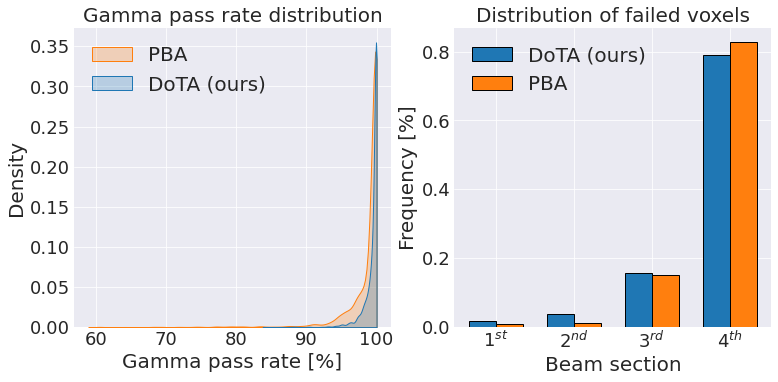

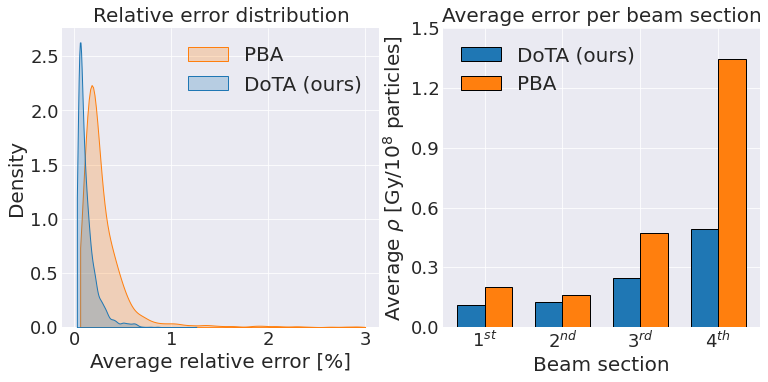

In [9]:
## Plot distributions
fig, axs = plt.subplots(1, 2, figsize=(12.5,5.5))
#axs[0].hist([100*pr[ind_gamma],100*pr_pba[ind_gamma]],15, density=True)
sns.kdeplot(data=[100*pr[ind_gamma],100*np.tile(pr_pba[ind_gamma],2)],fill=True,ax=axs[0],clip=(0.0, 100.0))
axs[0].set_title('Gamma pass rate distribution', fontsize=20)
axs[0].set_xlabel('Gamma pass rate [%]', fontsize=20)
axs[0].set_ylabel('Density', fontsize=20)
axs[0].xaxis.set_tick_params(labelsize=18)
axs[0].yaxis.set_tick_params(labelsize=18)
axs[0].legend(['PBA', 'DoTA (ours)'], fontsize=20, loc='upper left')

num_sections = len(re_sec)
x = np.arange(num_sections)  # the label locations
width = 0.35  # the width of the bars
axs[1].bar(x - width/2, pr_sec, width, label='Transformer (ours)', linewidth=1, edgecolor='k')
axs[1].bar(x + width/2, pr_pba_sec, width, label='PBA',  linewidth=1, edgecolor='k')
axs[1].set_title('Distribution of failed voxels', fontsize=20)
axs[1].set_xlabel('Beam section', fontsize=20)
axs[1].set_ylabel('Frequency [%]', fontsize=20)
axs[1].set_xticks([0,1,2,3])
axs[1].set_xticklabels(['$1^{st}$','$2^{nd}$','$3^{rd}$','$4^{th}$'])
axs[1].xaxis.set_tick_params(labelsize=18)
axs[1].yaxis.set_tick_params(labelsize=18)
axs[1].legend(['DoTA (ours)', 'PBA'], fontsize=20, loc='upper left')

fig.savefig('temp.png', dpi=300, bbox_inches='tight')

fig, axs = plt.subplots(1, 2, figsize=(12.5,5.5))

#axs[1].hist([re[ind_error],re_pba[ind_error]],15, density=True)
sns.kdeplot(data=[re[ind_error],np.tile(re_pba[ind_error],2)],fill=True,cut=0,ax=axs[0],clip=(0.0, 3.0))
axs[0].set_title('Relative error distribution', fontsize=20)
axs[0].set_xlabel('Average relative error [%]', fontsize=20)
axs[0].set_ylabel('Density', fontsize=20)
axs[0].xaxis.set_tick_params(labelsize=18)
axs[0].yaxis.set_tick_params(labelsize=18)
axs[0].legend(['PBA', 'DoTA (ours)'], fontsize=20, loc='upper right')

axs[1].bar(x - width/2, re_sec, width, label='Transformer (ours)', linewidth=1, edgecolor='k')
axs[1].bar(x + width/2, re_pba_sec, width, label='PBA', linewidth=1, edgecolor='k')
axs[1].set_title('Average error per beam section', fontsize=20)
axs[1].set_xlabel('Beam section', fontsize=20)
axs[1].set_ylabel(r'Average $\rho$ [Gy/$10^8$ particles]', fontsize=20)
axs[1].set_xticks([0,1,2,3])
axs[1].set_xticklabels(['$1^{st}$','$2^{nd}$','$3^{rd}$','$4^{th}$'])
axs[1].set_yticks([0,0.3,0.6,0.9,1.2,1.5])
#axs[1].set_xticklabels(['$1^{st}$','$2^{nd}$','$3^{rd}$','$4^{th}$'])
axs[1].xaxis.set_tick_params(labelsize=18)
axs[1].yaxis.set_tick_params(labelsize=18)
axs[1].legend(['DoTA (ours)', 'PBA'], fontsize=20, loc='upper left')

fig.savefig('temp2.png', dpi=300, bbox_inches='tight')